# A Quick Tour of TensorFlow

What does TensorFlow offer? Here’s a summary:

* **Its core is very similar to NumPy, but with GPU support**

* It supports distributed computing (across multiple devices and servers)

* It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, then optimizing it (e.g., by pruning unused nodes), and finally running it efficiently (e.g., by automatically running independent operations in parallel)

* Computation graphs can be exported to a portable format, so you can train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device)

* It implements autodiff (see Chapter 10 and Appendix D) and provides some excellent optimizers, such as RMSProp and Nadam (see Chapter 11), so you can easily minimize all sorts of loss functions

TensorFlow offers many more features built on top of these core features: the most important is of course tf.keras, but it also has data loading and preprocessing ops (tf.data, tf.io, etc), image processing ops (tf.image), signal processing ops (tf.signal), and more (see Figure 12-1)

<p align='center'>
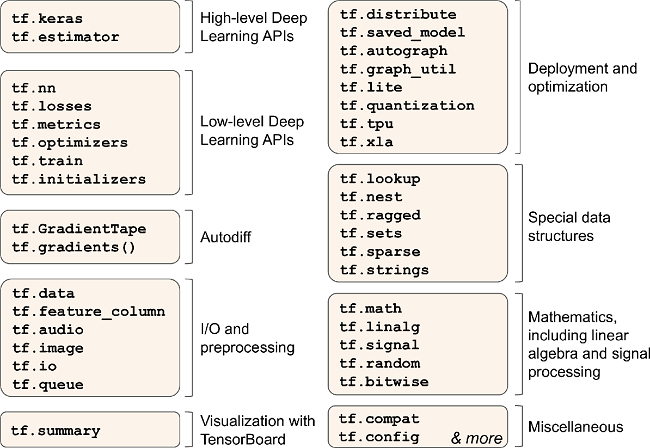
</p>
Figure 12-1. TensorFlow’s Python API

**At the lowest level, each TensorFlow operation (op for short) is implemented using highly efficient C++ code**. Many operations have multiple implementations called kernels: **each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs** (tensor processing units)

As you may know, GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips built specifically for Deep Learning operations

TensorFlow’s architecture is shown in Figure 12-2. **Most of the time your code will use the high-level APIs (especially tf.keras and tf.data)**; but when you need more flexibility, you will use the lower-level Python API, handling tensors directly

Note that APIs for other languages are also available. In any case, TensorFlow’s execution engine will take care of running the operations efficiently, even across multiple devices and machines if you tell it to



<p align='center'>
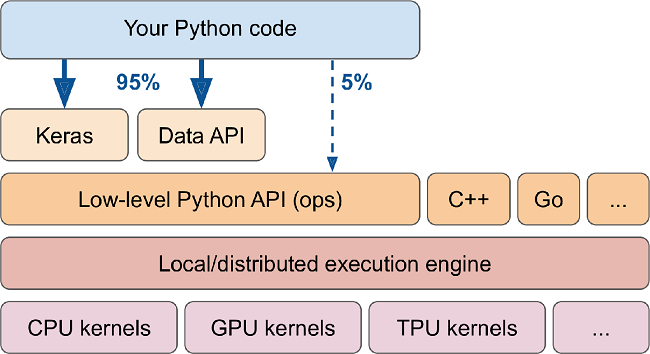
</p>
Figure 12-2. TensorFlow’s architecture

TensorFlow runs not only on Windows, Linux, and macOS, but also on mobile devices (using TensorFlow Lite), including both iOS and Android (see Chapter 19)

If you do not want to use the Python API, there are C++, Java, Go, and Swift APIs. There is even a JavaScript implementation called TensorFlow.js that makes it possible to run your models directly in your browser

There’s more to TensorFlow than the library. TensorFlow is at the center of an extensive ecosystem of libraries. First, there’s **TensorBoard** for visualization (see Chapter 10). Next, there’s **TensorFlow Extended (TFX)**, which is a set of libraries built by Google to productionize TensorFlow projects: it includes tools for data validation, preprocessing, model analysis, and serving (with **TF Serving**; see Chapter 19)

Google’ TensorFlow Hub provides a way to easily download and reuse pretrained neural networks. You can also get many neural network architectures, some of them pretrained, in TensorFlow’s [model garden](https://github.com/tensorflow/models/)

Check out the [TensorFlow Resources](www.tensorflow.org/resources) and https://github.com/jtoy/awesome-tensorflow for more TensorFlow-based projects. You will find hundreds of TensorFlow projects on GitHub, so it is often easy to find existing code for whatever you are trying to do

# Using TensorFlow like NumPy

TensorFlow’s API revolves around tensors, which flow from operation to operation—hence the name TensorFlow. A tensor is usually a multidimensional array (exactly like a NumPy ndarray), but it can also hold a scalar (a simple value, such as 42). These tensors will be important when we create custom cost functions, custom metrics, custom layers, and more, so let’s see how to create and manipulate them

## Tensors and Operations

You can create a tensor with tf.constant(). For example, here is a tensor representing a matrix with two rows and three columns of floats

In [1]:
import tensorflow as tf
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [2]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Just like an ndarray, a tf.Tensor has a shape and a data type (dtype)

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [4]:
t.dtype

tf.float32

Indexing works much like in Numpy:

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

Most importantly, all sorts of tensor operations are available:

In [7]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

Other operators like - and * are also supported. The @ operator was added in Python 3.5, for matrix multiplication: it is equivalent to calling the tf.matmul() function 

In [9]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [10]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

Note that writing t + 10 is equivalent to calling tf.add(t, 10) (indeed, Python calls the magic method t.__add__(10), which just calls tf.add(t, 10))

In [11]:
tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

You will find all the basic math operations you need

In [12]:
tf.multiply(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[10., 20., 30.],
       [40., 50., 60.]], dtype=float32)>

In [13]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
tf.exp(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

In [15]:
tf.sqrt(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.       , 1.4142135, 1.7320508],
       [2.       , 2.236068 , 2.4494898]], dtype=float32)>

and most operations that you can find in NumPy 

In [16]:
tf.reshape(t, (1, -1))

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=array([[1., 2., 3., 4., 5., 6.]], dtype=float32)>

In [17]:
tf.squeeze(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [18]:
tf.tile(t, [2, 2])

<tf.Tensor: shape=(4, 6), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6.],
       [1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6.]], dtype=float32)>

Some functions have a different name than in NumPy; for instance

In [19]:
tf.reduce_mean(t)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5>

In [20]:
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [21]:
tf.reduce_max(t)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [22]:
tf.math.log(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.       , 0.6931472, 1.0986123],
       [1.3862944, 1.609438 , 1.7917595]], dtype=float32)>

are the equivalent of np.mean(), np.sum(), np.max(), np.log()

When the name differs, there is often a good reason for it. For example, in TensorFlow you must write tf.transpose(t); you cannot just write t.T like in Numpy

The reason is that the **tf.transpose() function does not do exactly the same thing as Numpy's T attribute: in TensorFlow, a new tensor is created with its own copy of the transposed data, while in NumPy, t.T is just a transposed view on the same data**

Similarly, the tf.reduce_sum() operation is named this way because its GPU kernel uses a reduce algorithm that does not guarantee the order in which the elements are added: because 32-bit floats have limited precision, the result may change ever so slightly every time you call this operation

The same is true of tf.reduce_mean() (but of course tf.reduce_max() is deterministic)

## KERAS’ LOW-LEVEL API

The Keras API has its own low-level API, located in keras.backend

It includes functions like square(), exp(), and sqrt(). **In tf.keras, these functions generally just call the corresponding TensorFlow operations**. If you want to write code that will be portable to other Keras implementations, you should use these Keras functions. However, they only cover a subset of all functions available in TensorFlow, so in this book we will use the TensorFlow operations directly

Here is an simple example using keras.backend, which is commonly named K for short:


In [23]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## Tensors and NumPy

Tensors play nice with NumPy: you can create a tensor from a NumPy array, and vice versa. You can even apply TensorFlow operations to NumPy arrays and NumPy operations to tensors:

In [24]:
import numpy as np
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [25]:
t.numpy() # or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [27]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So **when you create a tensor from a NumPy array, make sure to set dtype=tf.float32**

## Type Conversions

Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, **TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types**

For example, you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit float and a 64-bit float

In [28]:
#tf.constant(2.) + tf.constant(40)



```
InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]
```



In [29]:
#tf.constant(2.) + tf.constant(40., dtype=tf.float64)



```
InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]
```



You can use tf.cast() when you really need to convert types:

In [30]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## Variables

The tf.Tensor values we've seen so far are immutable: you cannot modify them. This means that we cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation

Plus, other parameters may also need to change over time (e.g., a momentum optimizer keeps track of past gradients). What we need is a tf.Variable

In [31]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

A tf.Variable acts much like a tf.Tensor: you can perform the same operations with it, it plays nicely with NumPy as well, and it is just as picky with types

But it can also be modified in place using the assign() method (or assign_add() or assign_sub(), which increment or decrement the variable by the given value)

You can also modify individual cells (or slices), by using the cell’s (or slice’s) assign() method (direct item assignment will not work) or by using the scatter_update() or scatter_nd_update() methods:

In [32]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [33]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [34]:
v[1, :].assign([0., 1., 2.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 0.,  1.,  2.]], dtype=float32)>

In [35]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   6.],
       [  0.,   1., 200.]], dtype=float32)>

In practice you will rarely have to create variables manually, since Keras provides an add_weight() method that will take care of it for you, as we will see

Moreover, model parameters will generally be updated directly by the optimizers, so you will rarely need to update variables manually

## Other Data Structures

TensorFlow supports several other data structures, including the following

**Sparse tensors (tf.SparseTensor)**

* Efficiently represent tensors containing mostly zeros. The tf.sparse package contains operations for sparse tensors

**Tensor arrays (tf.TensorArray)**

* Are lists of tensors. They have a fixed size by default but can optionally be made dynamic. All tensors they contain must have the same shape and data type

**Ragged tensors (tf.RaggedTensor)**

* Represent static lists of lists of tensors, where every tensor has the same shape and data type. The tf.ragged package contains operations for ragged tensors

**String tensors**

Are regular tensors of type tf.string. These represent byte strings, not Unicode strings, so if you create a string tensor using a Unicode string (e.g., a regular Python 3 string like 'café'), then it will get encoded to UTF-8 automatically (e.g., b"caf\xc3\xa9")

Alternatively, you can represent Unicode strings using tensors of type tf.int32, where each item represents a Unicode code point (e.g., [99, 97, 102, 233]). The tf.string package contains ops for byte strings and Unicode strings (and to convert one into the other)

It’s important to note that a tf.string is atomic, meaning that its length does not appear in the tensor's shape. Once you convert it to a Unicode tensor (i.e., a tensor of type tf.int32 holding Unicode code points), the length appears in the shape

**Sets**

Are represented as regular tensors (or sparse tensors). For example, tf.constant([[1, 2], [3, 4]]) represents the two sets {1, 2} and {3, 4}

More generally, each set is represented by a vector in the tensor’s last axis. You can manipulate sets using operations from the tf.sets package

**Queues**

Store tensors across multiple steps. TensorFlow offers various kinds of queues: simple First In, First Out (FIFO) queues (FIFOQueue), queues that can prioritize some items (PriorityQueue), shuffle their items (RandomShuffleQueue), and batch items of different shapes by padding (PaddingFIFOQueue). These classes are all in the tf.queue package

# Customizing Models and Training Algorithms

## Custom Loss Functions

Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it:

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

Suppose you want to train a regression model, but your training set is a bit noisy. Of course, you start by trying to clean up your dataset by removing or fixing the outliers, but that turns out to be insufficient; the dataset is still noisy. Which loss function should you use?

This is probably a good time to use the Huber loss (introduced in Chapter 10) instead of the good old MSE. The Huber loss is not currently part of the official Keras API, but it is available in tf.keras (just use an instance of the keras.losses.Huber class)

But let’s pretend it’s not there: implementing it is easy as pie! Just create a function that takes the labels and predictions as arguments, and use TensorFlow operations to compute every instance’s loss:

In [37]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

**For better performance, you should use a vectorized implementation**, as in this example. Moreover, if you want to benefit from **TensorFlow’s graph features, you should use only TensorFlow operations**

It is also preferable to return a tensor containing one loss per instance, rather than returning the mean loss. This way, Keras can apply class weights or sample weights when requested (see Chapter 10)

Now you can use this loss when you compile the Keras model, then train your model:

In [38]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

In [39]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.6541 - mae: 1.0281 - val_loss: 0.2402 - val_mae: 0.5381
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2180 - mae: 0.5124 - val_loss: 0.1961 - val_mae: 0.4833


For each batch during training, Keras will call the huber_fn() function to compute the loss and use it to perform a Gradient Descent step. Moreover, it will keep track of the total loss since the beginning of the epoch, and it will display the mean loss

## Saving and Loading Models That Contain Custom Components

Saving a model containing a custom loss function works fine, as Keras saves the name of the function. Whenever you load it, you’ll need to provide a dictionary that maps the function name to the actual function. More generally, when you load a model containing custom objects, you need to map the names to the objects:

In [40]:
model.save('my_model_with_a_custom_loss.h5')

In [41]:
model = keras.models.load_model('my_model_with_a_custom_loss.h5',
                                custom_objects={'huber_fn' : huber_fn})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2007 - mae: 0.4902 - val_loss: 0.1906 - val_mae: 0.4732
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1960 - mae: 0.4838 - val_loss: 0.1853 - val_mae: 0.4667


With the current implementation, any error between –1 and 1 is considered “small.” But what if you want a different threshold? One solution is to create a function that creates a configured loss function:

In [42]:
def create_huber(thershold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < thershold
    squared_loss = tf.square(error) / 2
    linear_loss = thershold * tf.abs(error) - thershold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [43]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [44]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2173 - mae: 0.4837 - val_loss: 0.2088 - val_mae: 0.4708
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2125 - mae: 0.4785 - val_loss: 0.2485 - val_mae: 0.4946


In [45]:
model.save('my_model_with_a_custom_loss_threshold_2.h5')

Unfortunately, when you save the model, the threshold will not be saved. This means that you will have to specify the threshold value when loading the model (note that the name to us is "huber_fn", which is the name of the function you gave Keras, not the name of the function that created it):

In [46]:
model = keras.models.load_model('my_model_with_a_custom_loss_threshold_2.h5',
                                custom_objects={'huber_fn': create_huber(2.0)})

In [47]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2114 - mae: 0.4763 - val_loss: 0.2294 - val_mae: 0.4747
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2081 - mae: 0.4725 - val_loss: 0.2136 - val_mae: 0.4748


You can solve this by creating a subclass of the keras.losses.Loss class, and then implementing its get_config() method:

In [48]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

* The constructor accepts **kwargs and passes them to the parent constructor, which handles standard hyperparameters: the name of the loss and the reducion algorithm to use to aggregate the individual instance losses. By default, it is 'sum_over_batch_size', which means that the loss will be the sum of the instance losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is not the weighted mean). Other possible values are "sum" and None

* The call() method takes the labels and predictions, computes all the instance losses, and returns them

* The get_config() method returns a dictionary mapping each hyperparameter name to its value. It first calls the parent class's get_config() method, then adds the new hyperparameters to this dictionary (note that the convenient {**x} syntax was added in Python 3.5)

You can then use any instance of this class when you compile the model:

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [50]:
model.compile(loss=HuberLoss(2.), optimizer='nadam', metrics=['mae'])

When you save the model, the threshold will be saved along with it; and when you load the model, you just need to map the class name to the class itself:

In [51]:
model.save("my_model_with_a_custom_loss_class.h5")

In [52]:
model = keras.models.load_model('my_model_with_a_custom_loss_class.h5',
        custom_objects={'HuberLoss': HuberLoss})

When you save a model, Keras calls the loss instance’s get_config() method and saves the config as JSON in the HDF5 file. When you load the model, it calls the from_config() class method on the HuberLoss class: this method is implemented by the base class (Loss) and creates an instance of the class, passing **config to the constructor

## Custom Activation Functions, Initializers, Regularizers, and Constraints

Most Keras functionalities, such as losses, regularizers, constraints, initializers, metrics, activation functions, layers, and even full models, can be customized in very much the same way

Most of the time, you will just need to write a simple function with the appropriate inputs and outputs. Here are examples of a custom activation function (equivalent to keras.activations.softplus() or tf.nn.softplus()), a custom Glorot initializer (equivalent to keras.initializers.glorot_normal()), a custom $l_1$ regularizer (equivalent to keras.regularizers.l1(0.01)), and a custom constraint that enusres weights are all positive (equivalent to kears.constrains.nonneg() or tf.nn.relu()):

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

As you can see, the arguments depend on the type of custom function. These custom functions can then be used normally; for example:

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [56]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [57]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [58]:
model.save("my_model_with_many_custom_parts.h5")

In [59]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

The activation function will be applied to the output of this Dense layer, and its result will be passed on to the next layer. The layer's weight will be initialized using the value returned by the initializer. At each training step the weights will be passed to the regularization function to compute the regularization loss, which will be added to the main loss to get the final loss used for training. Finally, the constraint function will be called after each training step, and the layer’s weights will be replaced by the constrained weights

If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class, such as keras.regularizers.Regularizerm keras.constraints.Constraint, keras.initializers.Initializer or keras.layers.Layer (for any layer, including activation functions)

Much like we did for the custom loss, here is a simple class for $l_1$ regulatization that saves its factor parameter (this time we do not need to call the parent constructor or the get_config() method, as they are not defined by the parent class):

In [60]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor
  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor * weights))
  def get_config(self):
    return {'factor': self.factor}

Note that you must implement the call() method for losses, layers (including activation functions), and models, or the __call__() method for regularizers, initializers, and constraints

## Custom Metrics

Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by Gradient Descent to train a model, so they must be differentiable (at least where they are evaluated), and their gradients should not be 0 everywhere. Plus, it’s OK if they are not easily interpretable by humans

In contrast, metrics (e.g., accuracy) are used to evaluate a model: they must be more easily interpretable, and they can be non-differentiable or have 0 gradients everywhere

That said, in most cases, defining a custom metric function is exactly the same as defining a custom loss function

In fact, we could even use the Huber loss function we created earlier as a metric; it would work just fine (and persistence would also work the same way, in this case only saving the name of the function, "huber_fn"):

In [61]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

For each batch during training, Keras will compute this metric and keep track of its mean since the beginning of the epoch. Most of the time, this is exactly what you want

But not always! Consider a binary classifier’ precision, for example. As we saw in Chapter 3, precision is the number of true positives divided by the number of positive predictions (including both true positives and false positives). Suppose the model made five positive predictions in the first batch, four of which were correct: that’ 80% precision. Then suppose the model made three positive predictions in the second batch, but they were all incorrect: that’s 0% precision for the second batch. If you just compute the mean of these two precisions, you get 40%

But wait a second—that’s not the model’s precision over these two batches! Indeed, there were a total of four true positives (4 + 0) out of eight positive predictions (5 + 3), so the overall precision is 50%, not 40%. What we need is an object that can keep track of the number of true positives and the number of false positives and that can compute their ratio when requested. This is precisely what the keras.metrics.Precision class does:

In [63]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [64]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In this example, we created a Precision object, then we used it like a function, passing it the labels and predictions for the first batch, then for the second batch (note that we could also have passed sample weights)

We used the same number of true and false positives as in the example we just discussed. After the first batch, it returns a precision of 80%; then after the second batch, it returns 50% (which is the overall precision so far, not the second batch’s precision). This is called a **streaming metric (or stateful metric), as it is gradually updated, batch after batch**

At any point, we can call the result() method to get the current value of the metric. We can also look at its variables (tracking the number of true and false positives) by using the variables attribute, and we can reset these variables using the reset_states() method:

In [66]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [67]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [70]:
precision.reset_states() # both variables get reset to 0.0
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

**If you need to create such a streaming metric, create a subclass of the keras.metrics.Metric class**

Here is a simple example that keeps track of the total Huber loss and the number of instances seen so far. When asked for the result, it returns the ratio, which is simply the mean Huber loss:

In [71]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self, threshold=1.0, **kwargs):
    super().__init__(**kwargs) # handles base args (e.g., dtype)
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    self.total = self.add_weight('total', initializer='zeros')
    self.count = self.add_weight('count', initializer='zeros')
  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
  def result(self):
    return self.total / self.count
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

* The constructor uses the add_weight() method to create the variables needed to keep track of the metric's state over multiple batches-in this case, the sum of all Huber losses (total) and the number of instances seen so far (count). You could just create variables manually if you preferred. Keras tracks any tf.Variable tht is set as an attribute ((and more generally, any “trackable” object, such as layers or models)

* The update_state() method is called when you use an instance of this class as a function (as we did with the Precision object). It updates the variables, given the labels and predictions for the batch (and sample weights, but in this case we ignore them)

* The result() method computes and returns the final result, in this case the mean Huber metric over all instances. When you use the metric as a function, the update_state() method gets called first, then the result() method is called, and its output is returned

* We also implement the get_config() method to ensure the threshold gets saved along with the model

* The default implementation of the reset_states() method resets all variables to 0.0 (but you can override it if needed)

**When you define a metric using a simple function, Keras automatically calls it for each batch, and it keeps track of the mean during each epoch**, just like we did manually. So the only benefit of our HuberMetric class is that the threshold will be saved

But of course, some metrics, like precision, cannot simply be averaged over batches: in those cases, there’ no other option than to implement a streaming metric

## Custom Layers

You may occasionally want to build an architecture that contains an exotic layer for which TensorFlow does not provide a default implementation. In this case, you will need to create a custom layer

**Or you may simply want to build a very repetitive architecture, containing identical blocks of layers repeated many times, and it would be convenient to treat each block of layers as a single layer**. For example, if the model is a sequence of layers A, B, C, A, B, C, A, B, C, then you might want to define a custom layer D containing layers A, B, C, so your model would then simply be D, D, D. Let’s see how to build custom layers

First, some layers have no weights, such as keras.layers.Flatten or keras.layers.ReLU. If you want to create a custom layer without any weights, the simplest option is to write a function and wrap it on a keras.layers.Lambda layer. For example, the following layrer will apply the exponential function to its inputs:

In [72]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [73]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

This custom layer can then be used like any other layer, using the Sequential API, the Functional API, or the Subclassing API

You can also use it as an activation function (or you could use activation=tf.exp, activation=keras.activations.exponential, or simply activation='exponential')

The exponential layer is sometimes used in the output layer of a regression model when the values to predict have very different scales (e.g., 0.001, 10., 1,000)

As you’ve probably guessed by now, to build a custom stateful layer (i.e., a layer with weights), you need to create a subclass of the keras.layers.Layer class. For example, the following class implements a simplified version of the Dense layer:


In [75]:
class MyDense(keras.layers.Layer):
  def __inif__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)
  
  def build(self, batch_input_shape):
    self.kernel = self.add_weight(
        name='kernel', shape=[batch_input_shape[-1], self.units],
        initializer='glorot_normal')
    self.bias = self.add_weight(
        name='bias', shape=[self.units], initializer='zeros')
    super().build(batch_input_shape) # must be at the end

  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)

  def compute_output_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1] + 
           [self.units])
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'units': self.units,
            'activation': keras.activations.serialize(self.activation)}

* The constructor